## CNN Fundamentals on CIFAR-10 Dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import PIL.Image
import cv2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

2023-08-20 07:36:04.032390: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 07:36:04.069925: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 07:36:04.070801: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 07:36:04.699670: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load CIFAR-10 Dataset from keras dataset
cifar = tf.keras.datasets.cifar10
(train_images, train_labels),(test_images, test_labels) = cifar.load_data()

In [3]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
train_labels[0]

array([6], dtype=uint8)

In [6]:
test_images.shape, test_labels.shape

((10000, 32, 32, 3), (10000, 1))

In [7]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
type(train_labels)

numpy.ndarray

In [9]:
# Scale the image data
train_images, test_images = train_images/255, test_images/255

In [10]:
# One-hot Encode the Labels
classes_no = len(np.unique(train_labels))
train_labels = tf.keras.utils.to_categorical(train_labels, classes_no)
test_labels = tf.keras.utils.to_categorical(test_labels, classes_no)

In [11]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

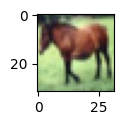

In [12]:
# Show a single image
plt.figure(figsize=(1,1))
plt.imshow(train_images[7])
plt.show()

In [13]:
# # Split Train images into Train and Validation Images
# train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.20, random_state=42)

In [14]:
# Make the Convolution Layers
layers = [
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.Dense(10, activation='softmax') 
]

model_clf = tf.keras.models.Sequential(layers)

In [15]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [16]:
# Compile The model
loss = 'categorical_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']
model_clf.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [17]:
# Train the Model

# Callback Function
checkpoint = ModelCheckpoint(filepath='artifacts/cnn_cifar_10.h5', save_best_only=True, save_weights_only=False)
earlystoping = EarlyStopping(monitor='loss', patience=3, min_delta=0.01)
history = model_clf.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.2, callbacks=[checkpoint, earlystoping], verbose=1)

Epoch 1/10
625/625 [==============================] - 18s 28ms/step - loss: 1.6482 - accuracy: 0.4363 - val_loss: 1.3495 - val_accuracy: 0.5509
Epoch 2/10
625/625 [==============================] - 18s 28ms/step - loss: 1.2708 - accuracy: 0.5810 - val_loss: 1.2038 - val_accuracy: 0.6052
Epoch 3/10
625/625 [==============================] - 18s 29ms/step - loss: 1.1185 - accuracy: 0.6439 - val_loss: 1.0619 - val_accuracy: 0.6616
Epoch 4/10
625/625 [==============================] - 15s 24ms/step - loss: 1.0294 - accuracy: 0.6780 - val_loss: 1.0197 - val_accuracy: 0.6861
Epoch 5/10
625/625 [==============================] - 15s 24ms/step - loss: 0.9659 - accuracy: 0.7071 - val_loss: 1.0038 - val_accuracy: 0.6930
Epoch 6/10
625/625 [==============================] - 15s 24ms/step - loss: 0.9003 - accuracy: 0.7289 - val_loss: 0.9246 - val_accuracy: 0.7307
Epoch 7/10
625/625 [==============================] - 15s 24ms/step - loss: 0.8569 - accuracy: 0.7485 - val_loss: 0.9393 - val_accuracy:

In [18]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 625}

In [19]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.648173,0.436250,1.349479,0.5509
1,1.270761,0.581025,1.203751,0.6052
2,1.118549,0.643875,1.061891,0.6616
3,1.029406,0.677975,1.019681,0.6861
4,0.965870,0.707125,1.003752,0.6930
5,0.900312,0.728875,0.924630,0.7307
6,0.856948,0.748525,0.939338,0.7262
7,0.811010,0.767700,0.917701,0.7352
8,0.771751,0.783800,0.930733,0.7332
9,0.742208,0.794050,0.927178,0.7364


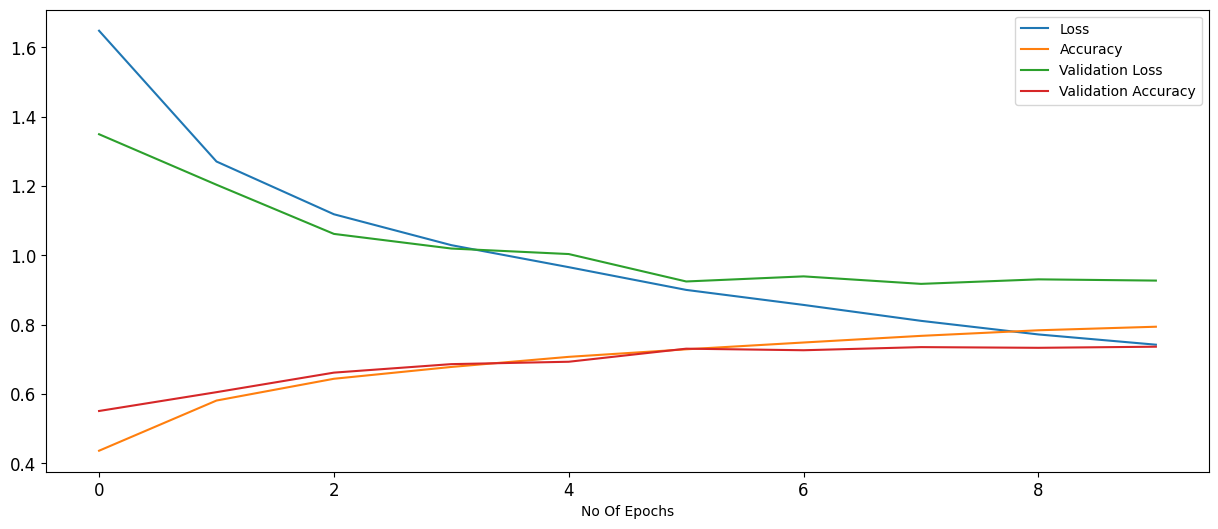

In [20]:
# Plot loss and accuracy history per epoch
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(history.history))
plt.xlabel("No Of Epochs")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Loss','Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

In [21]:
# Evaluate the Model
model_clf.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.9443 - accuracy: 0.7308


[0.9443273544311523, 0.7307999730110168]

In [22]:
# Predict the model
actual_image = train_images[0]
actual_label = train_labels[0]
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_predict = model_clf.predict(np.expand_dims(actual_image, axis=0))
np.argmax(y_predict)

1/1 [==============================] - 0s 75ms/step


6

In [23]:
cifar10_labels[np.argmax(y_predict)]

'frog'

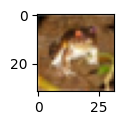

In [24]:
plt.figure(figsize=(1,1))
plt.imshow(actual_image)
plt.show()

In [25]:
y_predict = model_clf.predict(test_images)

313/313 [==============================] - 1s 4ms/step


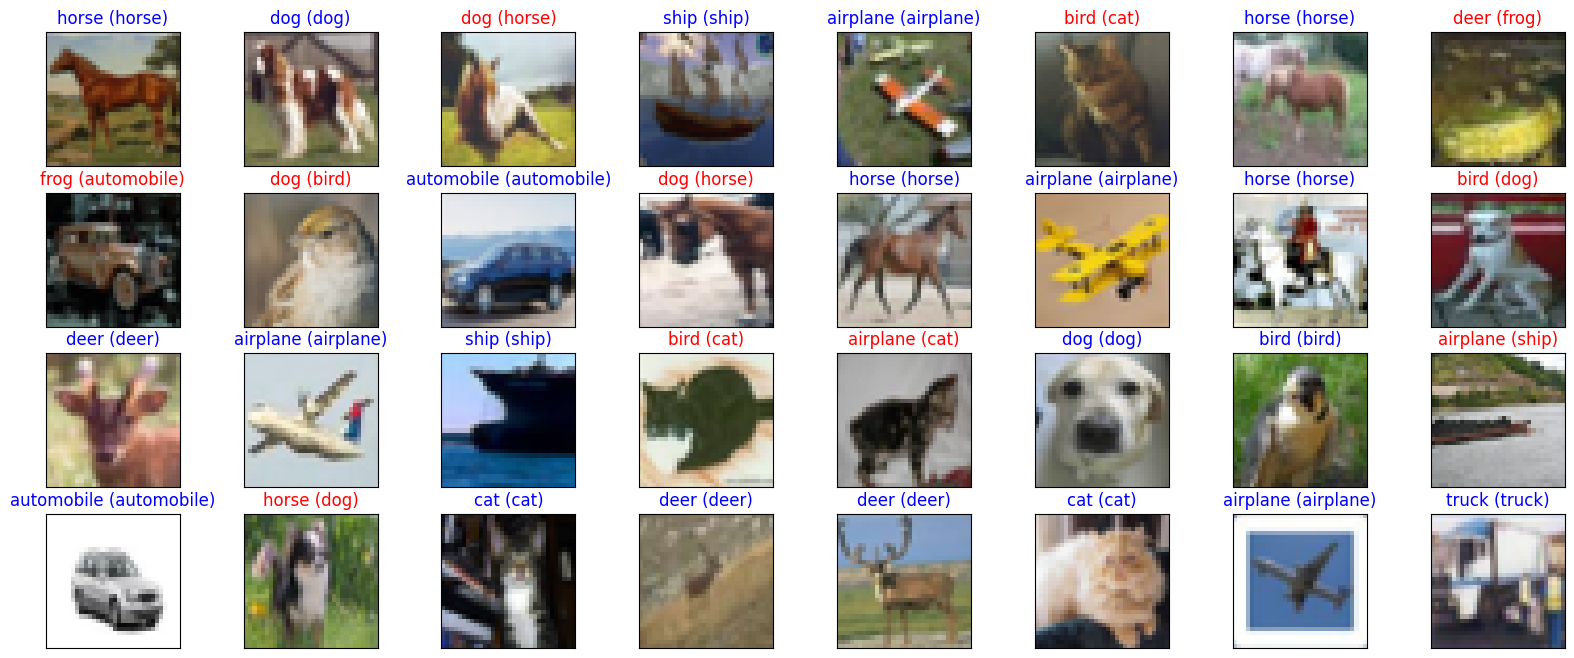

In [26]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(test_images.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]))
    pred_idx = np.argmax(y_predict[idx])
    true_idx = np.argmax(test_labels[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [27]:
# Now Use the Model

In [2]:
# Load the Model
model = load_model('artifacts/cnn_cifar_10.h5')
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

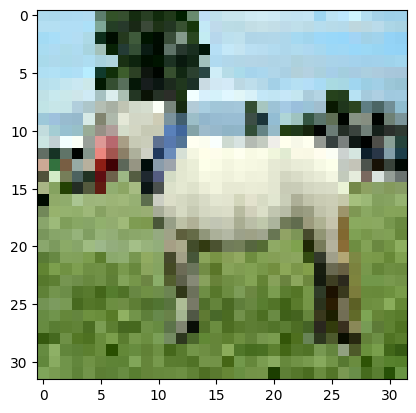

In [35]:
# input_image = PIL.Image.open('artifacts/demo.jpg')
input_image = tf.keras.utils.load_img('artifacts/horse.jpeg', target_size=(32,32))
input_image = tf.keras.utils.img_to_array(input_image)
input_image = input_image/255
plt.imshow(input_image)
plt.show()

In [36]:
input_image = np.expand_dims(input_image, axis=0)
y_pred = model.predict(input_image)
np.argmax(y_pred)
cifar10_labels[np.argmax(y_pred)]

1/1 [==============================] - 0s 15ms/step


'horse'

In [61]:
## Image 01

In [21]:
horse_img = cv2.imread('artifacts/demo.jpg')
horse_img.shape

(480, 640, 3)

In [22]:
horse_img[:,:,0]

array([[140, 128, 123, ...,  67,  62,  78],
       [125, 122, 102, ...,  94,  59,  78],
       [108, 110,  84, ...,  69,  78,  88],
       ...,
       [ 21,  21,  17, ..., 155, 155, 158],
       [ 17,  22,  16, ..., 175, 174, 162],
       [ 14,  22,  17, ..., 165, 166, 160]], dtype=uint8)

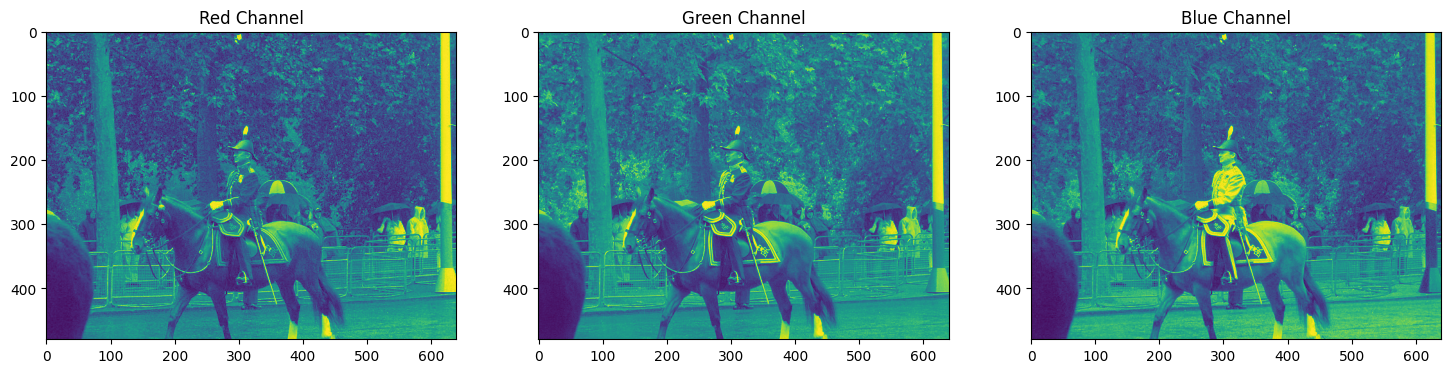

In [23]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(horse_img[:,:,0])
plt.title('Red Channel')

plt.subplot(1,3,2)
plt.imshow(horse_img[:,:,1])
plt.title('Green Channel')

plt.subplot(1,3,3)
plt.imshow(horse_img[:,:,2])
plt.title('Blue Channel')

plt.show()

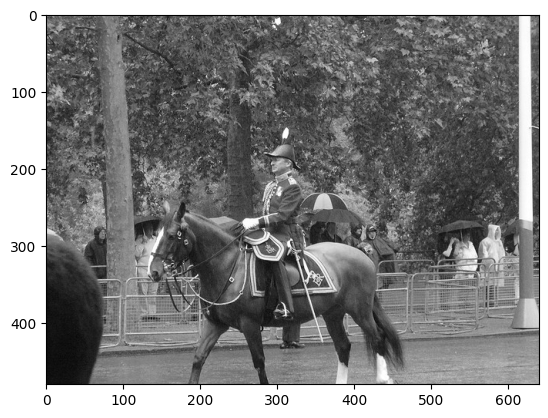

In [37]:
gray_image = cv2.cvtColor(horse_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

In [40]:
# Use Filter on top of the image
# Filter for Horizontal Edge Detection
filter_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Filter for Vertical Edge Detection
filter_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

filter_x, filter_y

(array([[-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1]]),
 array([[-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]]))

In [41]:
filtered_image01 = cv2.filter2D(gray_image, -1, filter_x)
filtered_image02 = cv2.filter2D(gray_image, -1, filter_y)

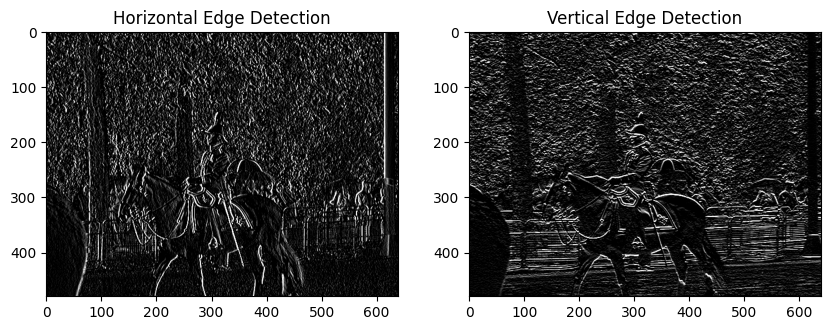

In [43]:

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.imshow(filtered_image01, cmap='gray')
plt.title('Horizontal Edge Detection')

plt.subplot(1,2,2)
plt.imshow(filtered_image02, cmap='gray')
plt.title('Vertical Edge Detection')

plt.show()

In [13]:
horse_img[:,:,2].shape

(194, 259)

In [14]:
avg_pixel = (horse_img[:,:,0]+ horse_img[:,:,1]+horse_img[:,:,2])/3
avg_pixel.shape

(194, 259)

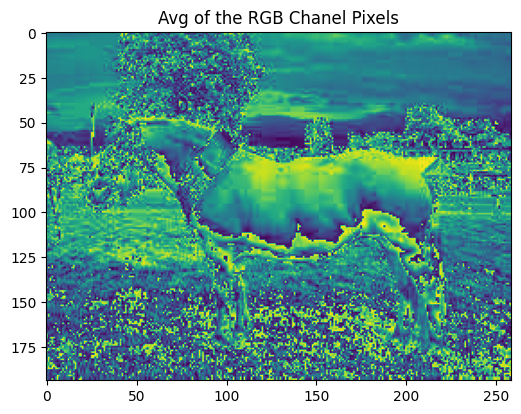

In [15]:
plt.figure(figsize=(6,6))
plt.imshow(avg_pixel)
plt.title('Avg of the RGB Chanel Pixels')
plt.show()

In [18]:
red_channel = horse_img[:,:,0]
pixel_df = pd.DataFrame(red_channel)
pixel_df

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,233,233,233,234,234,234,235,235,233,233,...,231,231,230,230,230,229,229,227,227,227
1,234,234,234,235,235,235,236,236,234,234,...,233,232,232,232,231,231,231,229,229,229
2,233,234,234,234,235,235,235,235,234,234,...,234,234,233,233,233,232,232,232,230,230
3,236,236,236,236,237,237,238,238,236,236,...,236,236,235,235,235,234,232,233,231,231
4,236,236,237,237,237,238,238,238,237,237,...,237,237,236,236,236,235,233,234,232,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,58,77,61,66,69,63,54,68,44,60,...,47,52,32,22,44,56,46,60,56,44
190,76,72,54,72,90,89,57,79,71,82,...,27,56,34,42,62,67,44,43,44,38
191,66,66,59,65,64,63,47,109,72,80,...,31,51,22,54,68,69,31,62,50,44
192,84,72,59,57,54,97,47,67,75,65,...,37,42,34,38,52,55,42,30,36,57


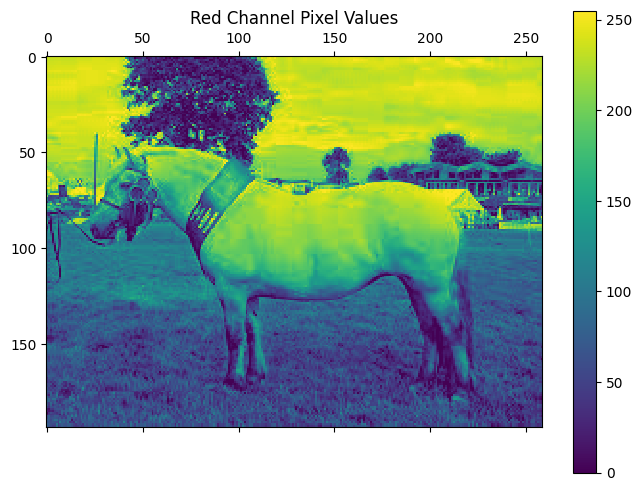

In [17]:
# Display the DataFrame using Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(pixel_df, cmap='viridis')  # Use 'viridis' colormap for better visualization
plt.title('Red Channel Pixel Values')
plt.colorbar(cax)  # Add a colorbar to show pixel value range
plt.show()

In [30]:
horse_img = cv2.imread('artifacts/horse.jpeg')
horse_img = cv2.resize(horse_img, (32,32))
horse_img = horse_img.astype('float32')/255
horse_img = np.expand_dims(horse_img, axis=0)

In [31]:
prediction = model.predict(horse_img)
predicted_class = np.argmax(prediction)
cifar10_labels[predicted_class]

1/1 [==============================] - 0s 68ms/step


'horse'

In [32]:
## Image 02

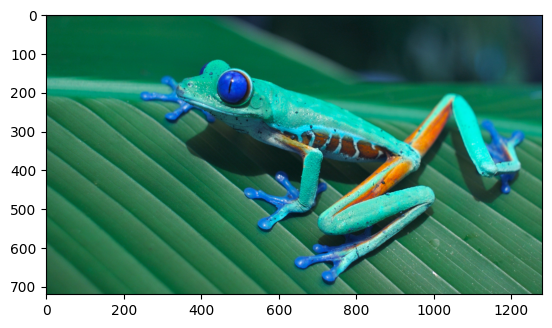

In [17]:
demo_img = cv2.imread('artifacts/frog.png')
plt.imshow(demo_img)
plt.show()

In [18]:
demo_img = cv2.resize(demo_img, (32,32))
demo_img = demo_img.astype('float32')/255
demo_img = np.expand_dims(demo_img, axis=0)

In [19]:
prediction = model.predict(demo_img)
predicted_class = np.argmax(prediction)
cifar10_labels[predicted_class]

1/1 [==============================] - 0s 83ms/step


'frog'